In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Set option to display all columns of the DataFrame
pd.set_option('display.max_columns', None)

In [3]:
data_path = '../data/updated_ecommerce.csv'

try:
    data = pd.read_csv(data_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(data_path, encoding='ISO-8859-1')  # Using ISO-8859-1 if UTF-8 fails


In [4]:
data

,order_id,date_ordered,date_shipped,ship_mode,customer_id,segment,city,state,postal_code,region,product_id,category,subcategory,sales,quantity,discount,profit,processing_time
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,261.9600,2,0.00,41.9136,3
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,731.9400,3,0.00,219.5820,3
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,14.6200,2,0.00,6.8714,4
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,957.5775,5,0.45,-383.0310,7
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,22.3680,2,0.20,2.5164,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Consumer,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,25.2480,3,0.20,4.1028,2
9989,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,91.9600,2,0.00,15.6332,5
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,258.5760,2,0.20,19.3932,5
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,29.6000,4,0.00,13.3200,5


In [5]:
data.isnull().sum()

order_id            0
date_ordered        0
date_shipped        0
ship_mode           0
customer_id         0
segment             0
city                0
state               0
postal_code         0
region              0
product_id          0
category            0
subcategory         0
sales              52
quantity            0
discount            0
profit              3
processing_time     0
dtype: int64

**Dataset Overview:**

- **Total Entries:** 9,993
- **Total Columns:** 17

**Key Details:**

- **Missing Values:** There are 52 missing entries in the 'sales' column and 3 missing entries in the 'profit' column. All other columns are fully populated.
- **Columns:** The dataset includes a mix of categorical data (e.g., order_id, customer_id, category, subcategory) and numerical data (e.g., sales, profit, quantity, discount).

**Next Steps for Imputation:**

Given the missing values in the 'sales' and 'profit' columns, and considering the complete data for related columns like category, subcategory, quantity, discount, and processing_time, we can proceed as follows:

1. **Correlation Analysis:** Check how the 'sales' and 'profit' columns correlate with numerical columns (quantity, discount, processing_time) to identify potential predictors.

2. **Missing Data Patterns:** Examine if missingness is random or if there's a pattern. This will influence the choice of imputation method.

3. **Implement and Compare Imputation Methods:**

   - **Mean/Median Imputation:** Quick and effective if data distribution is not heavily skewed.
   - **Regression Imputation:** Could be suitable if there's a strong linear relationship between 'sales'/'profit' and other numerical columns.
   - **K-Nearest Neighbors (KNN) Imputation:** Useful if there are similar patterns in other entries that can predict missing 'sales'/'profit'.
   - **Multiple Imputation by Chained Equations (MICE):** Robust method that accounts for randomness in the imputation process, potentially providing the most statistically sound results.


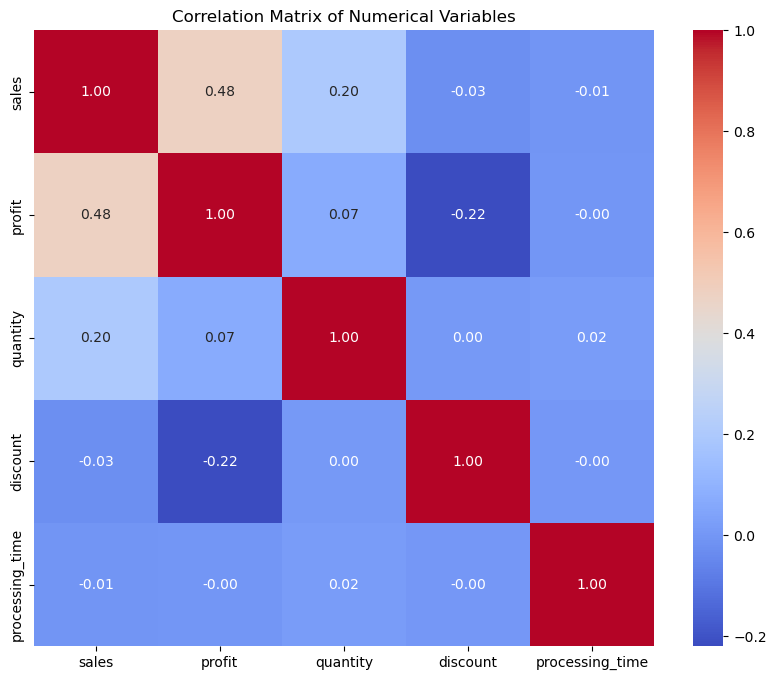

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for numerical columns including 'sales' and 'profit'
correlation_matrix = data[['sales', 'profit', 'quantity', 'discount', 'processing_time']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


**Correlation Heatmap Analysis:**

The correlation heatmap reveals the following relationships among the numerical features:

- **Sales and Profit:** There is a moderate positive correlation (𝜌 = 0.48) between sales and profit, suggesting that as sales increase, profit tends to increase as well. This relationship can be useful for regression-based imputation methods.

- **Sales and Quantity:** The correlation is relatively weak (𝜌 = 0.20), indicating that while there's some relationship, quantity alone may not be a strong predictor for sales.

- **Profit and Quantity:** The correlation is also quite weak (𝜌 = 0.07), suggesting that the quantity has minimal direct impact on profit.

- **Sales and Discount:** The correlation is negative (𝜌 = −0.03), which is very weak, implying that discounts do not significantly affect sales directly in this dataset.

- **Profit and Discount:** There's a weak negative correlation (𝜌 = −0.22), hinting that increasing discounts might slightly reduce profit margins.


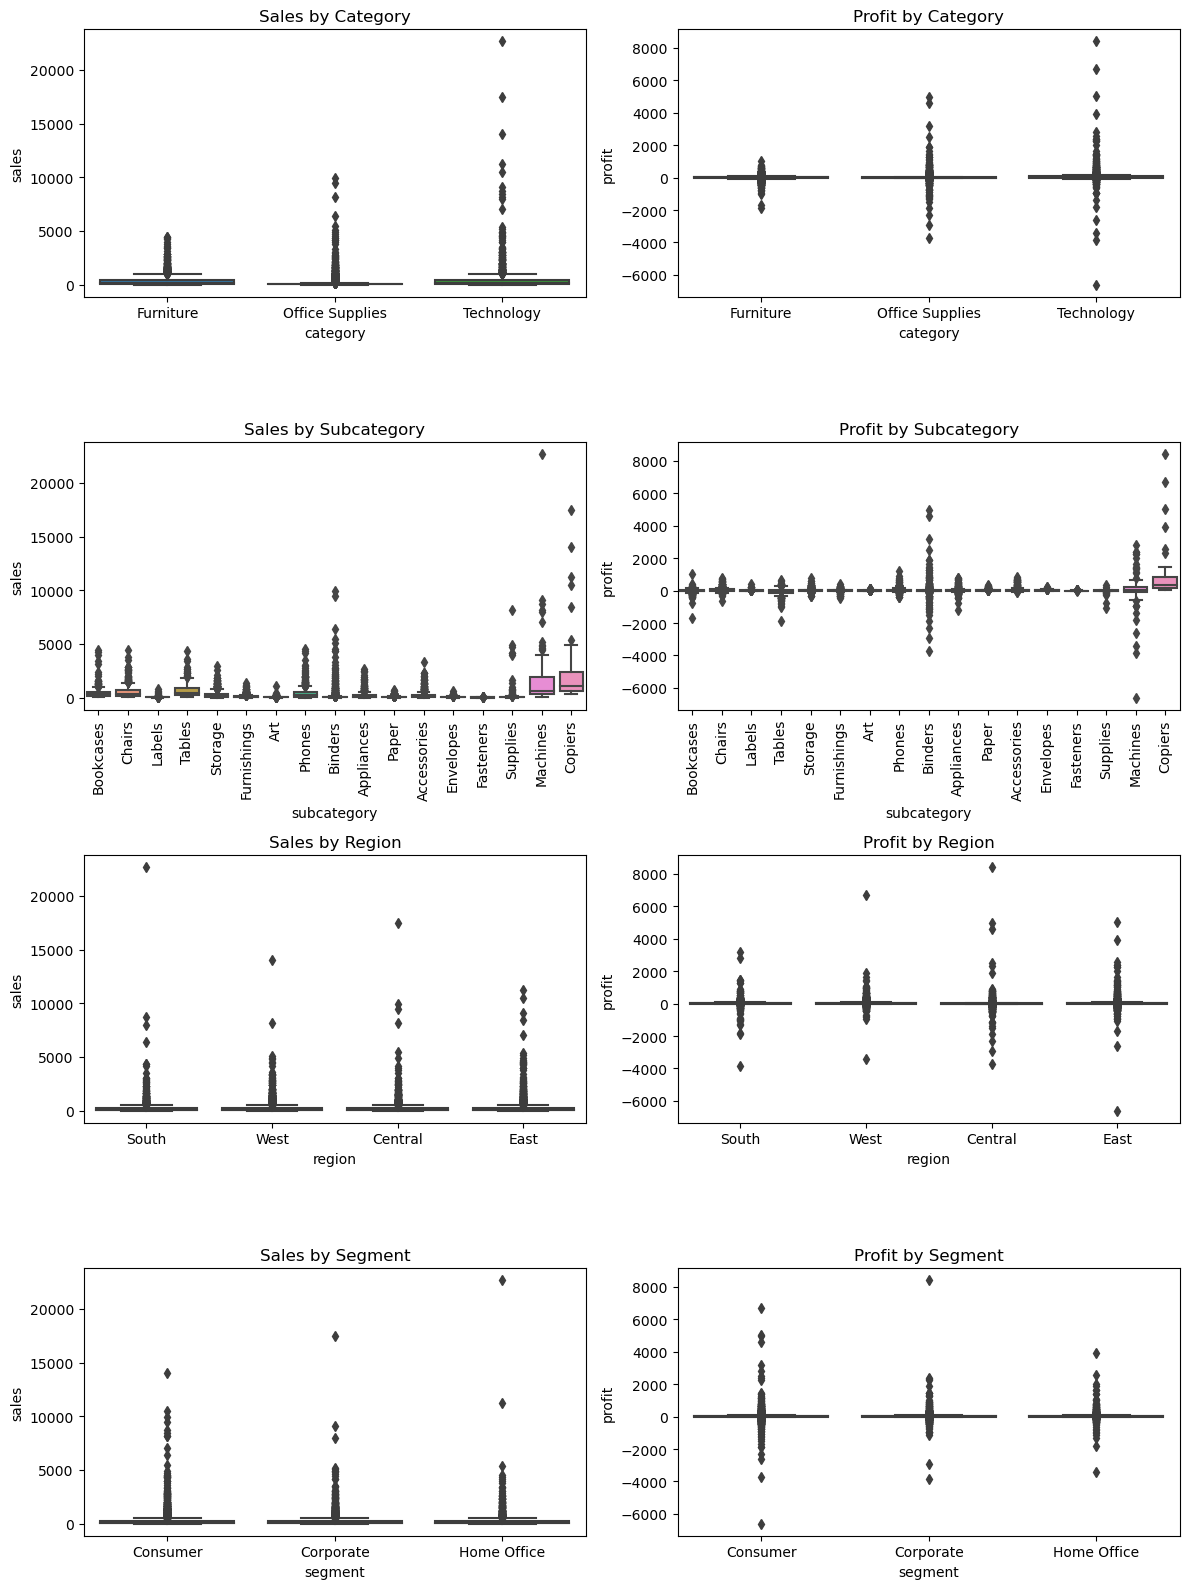

In [7]:
# Setting up plots for categorical variables against 'sales' and 'profit'
fig, ax = plt.subplots(4, 2, figsize=(12, 16))

# Plotting box plots for 'category'
sns.boxplot(data=data, x='category', y='sales', ax=ax[0, 0])
ax[0, 0].set_title('Sales by Category')
sns.boxplot(data=data, x='category', y='profit', ax=ax[0, 1])
ax[0, 1].set_title('Profit by Category')

# Plotting box plots for 'subcategory'
sns.boxplot(data=data, x='subcategory', y='sales', ax=ax[1, 0])
ax[1, 0].set_title('Sales by Subcategory')
ax[1, 0].tick_params(axis='x', rotation=90)
sns.boxplot(data=data, x='subcategory', y='profit', ax=ax[1, 1])
ax[1, 1].set_title('Profit by Subcategory')
ax[1, 1].tick_params(axis='x', rotation=90)

# Plotting box plots for 'region'
sns.boxplot(data=data, x='region', y='sales', ax=ax[2, 0])
ax[2, 0].set_title('Sales by Region')
sns.boxplot(data=data, x='region', y='profit', ax=ax[2, 1])
ax[2, 1].set_title('Profit by Region')

# Plotting box plots for 'segment'
sns.boxplot(data=data, x='segment', y='sales', ax=ax[3, 0])
ax[3, 0].set_title('Sales by Segment')
sns.boxplot(data=data, x='segment', y='profit', ax=ax[3, 1])
ax[3, 1].set_title('Profit by Segment')

plt.tight_layout()
plt.show()


In [8]:
# Identifying categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

categorical_cols, numerical_cols


(['order_id',
  'date_ordered',
  'date_shipped',
  'ship_mode',
  'customer_id',
  'segment',
  'city',
  'state',
  'region',
  'product_id',
  'category',
  'subcategory'],
 ['postal_code', 'sales', 'quantity', 'discount', 'profit', 'processing_time'])

In [9]:
data[data.isnull().any(axis=1)]

,order_id,date_ordered,date_shipped,ship_mode,customer_id,segment,city,state,postal_code,region,product_id,category,subcategory,sales,quantity,discount,profit,processing_time
533,CA-2016-168753,2016-05-29,2016-06-01,Second Class,RL-19615,Consumer,Montgomery,Alabama,36116,South,TEC-PH-10000984,Technology,Phones,NaN,5,0.0,274.3860,3
534,CA-2016-168753,2016-05-29,2016-06-01,Second Class,RL-19615,Consumer,Montgomery,Alabama,36116,South,OFF-BI-10002557,Office Supplies,Binders,NaN,5,0.0,11.3750,3
1269,CA-2017-100426,2017-06-04,2017-06-08,Standard Class,DC-12850,Consumer,Florence,Alabama,35630,South,OFF-PA-10002870,Office Supplies,Paper,NaN,2,0.0,5.6160,4
1431,CA-2014-120768,2014-12-19,2014-12-21,Second Class,IM-15070,Consumer,Florence,Alabama,35630,South,OFF-BI-10001191,Office Supplies,Binders,NaN,6,0.0,74.8524,2
1432,CA-2014-120768,2014-12-19,2014-12-21,Second Class,IM-15070,Consumer,Florence,Alabama,35630,South,OFF-SU-10004115,Office Supplies,Supplies,NaN,1,0.0,1.9629,2
1433,CA-2014-120768,2014-12-19,2014-12-21,Second Class,IM-15070,Consumer,Florence,Alabama,35630,South,FUR-CH-10000513,Furniture,Chairs,NaN,14,0.0,163.7874,2
1451,CA-2016-133711,2016-11-26,2016-11-29,First Class,MC-17425,Corporate,Mobile,Alabama,36608,South,OFF-PA-10001685,Office Supplies,Paper,NaN,7,0.0,34.7802,3
1452,CA-2016-133711,2016-11-26,2016-11-29,First Class,MC-17425,Corporate,Mobile,Alabama,36608,South,OFF-BI-10000666,Office Supplies,Binders,NaN,3,0.0,45.8400,3
1453,CA-2016-133711,2016-11-26,2016-11-29,First Class,MC-17425,Corporate,Mobile,Alabama,36608,South,OFF-BI-10004352,Office Supplies,Binders,NaN,5,0.0,16.8750,3
1454,CA-2016-133711,2016-11-26,2016-11-29,First Class,MC-17425,Corporate,Mobile,Alabama,36608,South,TEC-MA-10000010,Technology,Machines,NaN,8,0.0,1459.2000,3


In [10]:
# Filter data where 'sales' is null
null_sales_data = data[data['sales'].isnull()]

# Getting unique values for each column in the null sales data
unique_values = {column: null_sales_data[column].unique() for column in null_sales_data.columns}

# unique_values

**Order and Shipping Details:**

- **Order IDs:** There are 27 unique order IDs.
- **Date Ordered:** Unique order dates include 27 distinct dates spread from 2014 to 2017.
- **Date Shipped:** Corresponding to the order dates, there are 27 unique shipping dates.
- **Ship Mode:** Four shipping modes are used: Second Class, Standard Class, First Class, and Same Day.

**Customer and Geographic Information:**

- **Customer IDs:** 27 unique customer IDs, each likely representing individual transactions.
- **Segments:** Three segments are involved: Consumer, Corporate, and Home Office.
- **Cities:** All entries are from cities in Alabama, including Mobile, Montgomery, Huntsville, Decatur, Auburn, Florence, Hoover, and Tuscaloosa.
- **State:** All entries are from Alabama.
- **Region:** All are categorized under the 'South' region.

**Product Details:**

- **Product IDs:** 52 unique product IDs, reflecting a variety of products involved in these transactions.
- **Categories:** Products fall into three categories: Technology, Office Supplies, and Furniture.
- **Subcategories:** 15 subcategories are represented, including Phones, Binders, Paper, Supplies, Chairs, Machines, Storage, Accessories, Art, Furnishings, Copiers, Tables, Fasteners, Envelopes, and Labels.

**Transaction Details:**

- **Quantity:** Quantities range from 1 to 14 items per transaction.
- **Discount:** All transactions in these rows have no discount applied.
- **Profit:** Profits vary widely, with specific values listed for each transaction, showing a diverse profitability even without recorded sales data.
- **Processing Time:** Processing times from order to shipment range from 0 days (immediate shipment) to 7 days.

These details might help in identifying patterns or specific data quality issues related to these transactions.
